In [1]:
# At first I though I will download all the data from NSE site.. 
# but there are better APIs which will reduce the workload by a ton. Moving to that.

In [2]:
import pandas as pd
import numpy as np
import requests 
#from pynse import *
#nse=Nse()
from nsepy.history import get_price_list
import time
import yfinance as yf


In [3]:
# I will need three bhav copies. 
# 2 bhavcopies for Training - one for 2019 Jan to 2019 Jan

# I can do one more thing.. I can read prev 5 years of data ( Annual & Quarterly)
# Like 2010 to 2015 and then what was the return in 2016, 
# Likewise 2011 to 2016 and output in 2017, this way my rows will increase.

# One more thing.. simply getting one simple number is not going to be good.. 
# I should use MoM returns (12 values) and then avg them.. 
# that way it will be a good indicator of year long performance.

# Version 1: Train: Train the model for 2019 performance with data from 2010 to 2018
#            Validation: Score the model on performance till 2021, Check if the order is relatively correct or not.

# Version 2: Train: Train the model on 5 year back data for every 5 yr window till 2021.
#            Validate the model against any random rows.

In [42]:
# Created a function to get the list of all dates
def update_date(date_fetch,increment):
    date_fetch = date_fetch + datetime.timedelta(days=increment)
    return date_fetch

In [43]:
import datetime
from datetime import date
import calendar
prices = get_price_list(dt=date(2012,1,2))
prices

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,62.05,63.90,61.40,62.50,63.50,62.25,70533,4393274.15,02-JAN-2012,621,INE144J01019
1,3IINFOTECH,EQ,11.85,12.25,11.70,12.05,12.15,11.65,1528247,18131238.80,02-JAN-2012,5193,INE748C01020
2,3MINDIA,EQ,3588.80,3588.80,3450.10,3450.30,3450.10,3544.05,44,153583.70,02-JAN-2012,32,INE470A01017
3,A2ZMES,EQ,87.95,93.80,87.10,89.15,89.50,88.00,124736,11189791.15,02-JAN-2012,3493,INE619I01012
4,AANJANEYA,EQ,491.20,495.00,485.00,487.30,485.05,495.55,42492,20849628.50,02-JAN-2012,1076,INE928K01013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,ZODIACLOTH,EQ,211.95,213.20,206.10,211.00,211.00,207.90,169,35629.15,02-JAN-2012,49,INE206B01013
1522,ZODJRDMKJ,EQ,21.30,21.30,21.25,21.25,21.25,22.30,9,191.65,02-JAN-2012,2,INE077B01018
1523,ZUARIAGRO,EQ,460.05,472.00,457.05,467.30,463.00,455.30,1462,679100.85,02-JAN-2012,309,INE217A01012
1524,ZYDUSWELL,EQ,380.10,389.40,377.15,379.60,379.85,385.40,4608,1755352.25,02-JAN-2012,268,INE768C01010


In [44]:
#nse.bhavcopy(dt.date(2020,1,1)) # this did not work out as the historical data was not there
import datetime
from datetime import date
import calendar
#prices = get_price_list(dt=date(2015,1,1))

# var_year = 2021
# var_month = 2
# mid_date  =  date(var_year, var_month, 15)
# start_date = mid_date.replace(day = 1)
# print(start_date)
#df_start = get_price_list(dt=date(var_year,var_month,int("{:%d}".format(start_date))))
#df_start =  get_price_list(dt=date(2021,2,3))
#df_start.head(4)

# Function to download bhavcopy of 1st date of each month
def getting_bhavcopy():
    df_bhavcopy = pd.DataFrame()
    for var_year in range(2012,2022): #,2021
            for var_month in range(1,13):
                #print(var_year,var_month)
                mid_date  =  date(var_year, var_month, 15)
                start_date = mid_date.replace(day = 1)
                while True:
                    try:
                        #df_start = nse.bhavcopy(date(var_year,var_month,int("{:%d}".format(start_date))))
                        df_start = get_price_list(dt=date(var_year,var_month,int("{:%d}".format(start_date))))
                        print('Completed - ',start_date)
                        time.sleep(0.5)
                        break
                    except: 
                        print('Incorrect date {0}, trying again with increment of 1'.format(start_date))
                        start_date = update_date(start_date,1) 
                        pass
                df_bhavcopy = pd.concat([df_bhavcopy,df_start])
                df_bhavcopy.to_csv('df_bhavcopy.csv')
    return df_bhavcopy

df_bhavcopy = getting_bhavcopy()
# Removing duplicates to remove same set of rows for same dates
df_bhavcopy = df_bhavcopy.drop_duplicates()
df_bhavcopy.to_csv('df_bhavcopy.csv')

Incorrect date 2012-01-01, trying again with increment of 1
Completed -  2012-01-02
Completed -  2012-02-01
Completed -  2012-03-01
Incorrect date 2012-04-01, trying again with increment of 1
Completed -  2012-04-02
Incorrect date 2012-05-01, trying again with increment of 1
Completed -  2012-05-02
Completed -  2012-06-01
Incorrect date 2012-07-01, trying again with increment of 1
Completed -  2012-07-02
Completed -  2012-08-01
Incorrect date 2012-09-01, trying again with increment of 1
Incorrect date 2012-09-02, trying again with increment of 1
Completed -  2012-09-03
Completed -  2012-10-01
Completed -  2012-11-01
Incorrect date 2012-12-01, trying again with increment of 1
Incorrect date 2012-12-02, trying again with increment of 1
Completed -  2012-12-03
Completed -  2013-01-01
Completed -  2013-02-01
Completed -  2013-03-01
Completed -  2013-04-01
Incorrect date 2013-05-01, trying again with increment of 1
Completed -  2013-05-02
Incorrect date 2013-06-01, trying again with increme

In [ ]:
#getting_dates()
# print('today date',str(all_dates[0][0]))
# print("We need this date in this format {:%d, %b %Y}".format(all_dates[0][0]))
# print("We need this date in this format {:%d-%m-%Y}".format(all_dates[0][0]))
# print("Year is - {:%Y}".format(all_dates[0][0]))
# print("Month is - {:%b}".format(all_dates[0][0]))
# print("filenameis - {:%d%b%Y}".format(all_dates[0][0]).upper())


In [47]:
# Getting data for 2021
# Function to download bhavcopy of 1st date of each month
def getting_bhavcopy():
    df_bhavcopy = pd.DataFrame()
    for var_year in range(2021,2022): #,2021
            for var_month in range(1,13):
                #print(var_year,var_month)
                mid_date  =  date(var_year, var_month, 15)
                start_date = mid_date.replace(day = 1)
                while True:
                    try:
                        #df_start = nse.bhavcopy(date(var_year,var_month,int("{:%d}".format(start_date))))
                        df_start = get_price_list(dt=date(var_year,var_month,int("{:%d}".format(start_date))))
                        print('Completed - ',start_date)
                        time.sleep(0.5)
                        break
                    except: 
                        print('Incorrect date {0}, trying again with increment of 1'.format(start_date))
                        start_date = update_date(start_date,1) 
                        pass
                df_bhavcopy = pd.concat([df_bhavcopy,df_start])
                df_bhavcopy.to_csv('df_bhavcopy.csv')
    return df_bhavcopy

df_bhavcopy_2021 = getting_bhavcopy()
# Removing duplicates to remove same set of rows for same dates
df_bhavcopy_2021 = df_bhavcopy_2021.drop_duplicates()
#df_bhavcopy.to_csv('df_bhavcopy.csv')

Completed -  2021-01-01
Completed -  2021-02-01
Completed -  2021-03-01
Completed -  2021-04-01
Incorrect date 2021-05-01, trying again with increment of 1
Incorrect date 2021-05-02, trying again with increment of 1
Completed -  2021-05-03
Completed -  2021-06-01
Completed -  2021-07-01
Incorrect date 2021-08-01, trying again with increment of 1
Completed -  2021-08-02
Completed -  2021-09-01
Completed -  2021-10-01
Completed -  2021-11-01
Completed -  2021-12-01


In [138]:
df_bhavcopy_all = pd.concat([df_bhavcopy, df_bhavcopy_2021], ignore_index=True)
df_bhavcopy_all.to_csv('df_bhavcopy.csv')

[*********************100%***********************]  1 of 1 completed


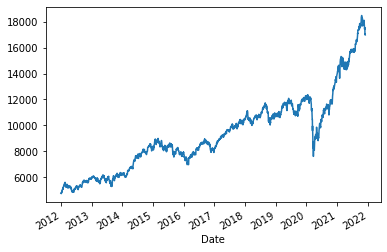

In [118]:
# Downloading data for NSE
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf

# Get the data for the stock AAPL
#data = yf.download('AHLEAST.NS','2016-01-01','2019-08-01')
#data = yf.download('^BSESN','2016-01-01','2019-08-01')
data = yf.download('^NSEI','2012-01-01','2021-12-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
#data['Close'].plot()
plt.show()

In [127]:
df_nifty = data.reset_index()
df_nifty.dtypes
df_bhavcopy_all.dtypes


SYMBOL          object
SERIES          object
OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
LAST           float64
PREVCLOSE      float64
TOTTRDQTY        int64
TOTTRDVAL      float64
TIMESTAMP       object
TOTALTRADES      int64
ISIN            object
dtype: object

In [133]:
#df_nifty.shape
df_nifty = data.reset_index()
df_nifty.columns = ['TIMESTAMP','OPEN','HIGH','LOW','CLOSE','ADJ_CLOSE','TOTTRDQTY']
df_nifty.head()
df_nifty['TIMESTAMP'] = pd.DatetimeIndex(df_nifty['TIMESTAMP']).strftime('%d-%b-%Y').str.upper()
df_nifty.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,ADJ_CLOSE,TOTTRDQTY
0,03-JAN-2012,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0
1,04-JAN-2012,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0
2,05-JAN-2012,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0
3,06-JAN-2012,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0
4,09-JAN-2012,4747.549805,4758.700195,4695.450195,4742.799805,4742.799805,0


In [134]:
#Getting the list of dates
dates_ = pd.DataFrame(df_bhavcopy_all.TIMESTAMP.value_counts())
list_date = dates_.index.to_list()
list_date

['01-NOV-2021',
 '01-DEC-2021',
 '03-MAY-2021',
 '01-DEC-2020',
 '01-JUN-2021',
 '01-MAR-2021',
 '01-APR-2020',
 '01-SEP-2020',
 '01-OCT-2021',
 '01-APR-2021',
 '01-NOV-2016',
 '02-NOV-2020',
 '01-AUG-2018',
 '01-OCT-2020',
 '01-JUN-2020',
 '01-NOV-2018',
 '03-OCT-2016',
 '01-MAR-2018',
 '01-JUL-2019',
 '01-FEB-2019',
 '02-JAN-2017',
 '01-DEC-2016',
 '01-AUG-2016',
 '01-SEP-2021',
 '02-AUG-2021',
 '02-MAY-2018',
 '01-SEP-2016',
 '03-DEC-2018',
 '03-SEP-2019',
 '01-JUN-2017',
 '01-FEB-2017',
 '01-AUG-2019',
 '01-SEP-2017',
 '01-JUL-2016',
 '03-SEP-2018',
 '02-APR-2018',
 '02-MAY-2019',
 '01-JAN-2020',
 '01-JUN-2018',
 '01-MAR-2019',
 '03-JUL-2017',
 '01-MAR-2017',
 '02-JUL-2018',
 '01-NOV-2019',
 '03-APR-2017',
 '02-MAY-2016',
 '03-JUN-2019',
 '01-MAR-2013',
 '01-JUN-2016',
 '01-JAN-2021',
 '01-AUG-2017',
 '01-JAN-2019',
 '01-OCT-2019',
 '03-OCT-2017',
 '01-JUL-2021',
 '01-APR-2019',
 '02-MAR-2020',
 '01-OCT-2018',
 '01-APR-2013',
 '01-FEB-2020',
 '02-DEC-2019',
 '01-DEC-2017',
 '01-NOV

In [140]:
df_nifty = df_nifty[df_nifty['TIMESTAMP'].isin(list_date)]
df_nifty['SYMBOL'] = 'NIFTY50'
df_nifty['SERIES'] = 'IN'

In [136]:
df_nifty.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,ADJ_CLOSE,TOTTRDQTY
20,01-FEB-2012,5198.149902,5244.600098,5159.000000,5235.700195,5235.700195,0
40,01-MAR-2012,5366.000000,5372.450195,5297.500000,5339.750000,5339.750000,0
61,02-APR-2012,5296.350098,5331.549805,5278.799805,5317.899902,5317.899902,0
80,02-MAY-2012,5254.299805,5279.600098,5226.450195,5239.149902,5239.149902,0
101,01-JUN-2012,4910.850098,4925.000000,4831.750000,4841.600098,4841.600098,0


In [141]:
# Appending Nifty returns so that we can subtract the performance of index 
df_bhavcopy_all = pd.concat([df_bhavcopy_all, df_nifty], ignore_index=True)
df_bhavcopy_all.to_csv('df_bhavcopy.csv')

In [142]:
df_bhavcopy_all.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,ADJ_CLOSE
0,20MICRONS,EQ,62.05,63.90,61.4,62.50,63.50,62.25,70533,4393274.15,02-JAN-2012,621.0,INE144J01019,NaN
1,3IINFOTECH,EQ,11.85,12.25,11.7,12.05,12.15,11.65,1528247,18131238.80,02-JAN-2012,5193.0,INE748C01020,NaN
2,3MINDIA,EQ,3588.80,3588.80,3450.1,3450.30,3450.10,3544.05,44,153583.70,02-JAN-2012,32.0,INE470A01017,NaN
3,A2ZMES,EQ,87.95,93.80,87.1,89.15,89.50,88.00,124736,11189791.15,02-JAN-2012,3493.0,INE619I01012,NaN
4,AANJANEYA,EQ,491.20,495.00,485.0,487.30,485.05,495.55,42492,20849628.50,02-JAN-2012,1076.0,INE928K01013,NaN


In [144]:
df_bhavcopy_all[df_bhavcopy_all['SYMBOL'] == 'NIFTY50']

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,ADJ_CLOSE
175005,NIFTY50,IN,5198.149902,5244.600098,5159.000000,5235.700195,NaN,NaN,0,NaN,01-FEB-2012,NaN,NaN,5235.700195
175006,NIFTY50,IN,5366.000000,5372.450195,5297.500000,5339.750000,NaN,NaN,0,NaN,01-MAR-2012,NaN,NaN,5339.750000
175007,NIFTY50,IN,5296.350098,5331.549805,5278.799805,5317.899902,NaN,NaN,0,NaN,02-APR-2012,NaN,NaN,5317.899902
175008,NIFTY50,IN,5254.299805,5279.600098,5226.450195,5239.149902,NaN,NaN,0,NaN,02-MAY-2012,NaN,NaN,5239.149902
175009,NIFTY50,IN,4910.850098,4925.000000,4831.750000,4841.600098,NaN,NaN,0,NaN,01-JUN-2012,NaN,NaN,4841.600098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175110,NIFTY50,IN,15755.049805,15755.549805,15667.049805,15680.000000,NaN,NaN,224900,NaN,01-JUL-2021,NaN,NaN,15680.000000
175111,NIFTY50,IN,15874.900391,15892.900391,15834.650391,15885.150391,NaN,NaN,244800,NaN,02-AUG-2021,NaN,NaN,15885.150391
175112,NIFTY50,IN,17185.599609,17225.750000,17055.050781,17076.250000,NaN,NaN,301900,NaN,01-SEP-2021,NaN,NaN,17076.250000
175113,NIFTY50,IN,17531.900391,17557.150391,17452.900391,17532.050781,NaN,NaN,305800,NaN,01-OCT-2021,NaN,NaN,17532.050781
